# KNN- iris beispiel 



ID — ID field that represents a specific machine.
DATE — The date of the observation.
REGION_CLUSTER — a field that represents the region in which the machine resides.
MAINTENANCE_VENDOR — a field that represents the company that provides maintenance and service to the machine.
MANUFACTURER — the company that manufactured the equipment in question.
WELL_GROUP — a field representing the type of machine.
EQUIPMENT_AGE — Age of the machine, in days.
S15 — A Sensor Value.
S17 — A Sensor Value.
S13 — A Sensor Value.
S16 — A Sensor Value.
S19 — A Sensor Value.
S18 — A Sensor Value.
S8 — A Sensor Value.
EQUIPMENT_FAILURE — A ‘1’ means that the equipment failed. A ‘0’ means the equipment did not fail.
Our first goal in this exercise is to build a model that predicts equipment failure. In other words, we will use the other variables in the data frame to predict EQUIPMENT_FAILURE.




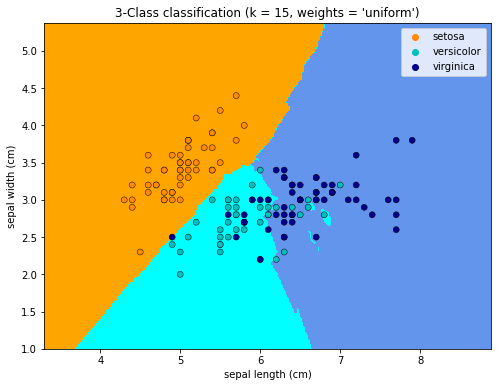

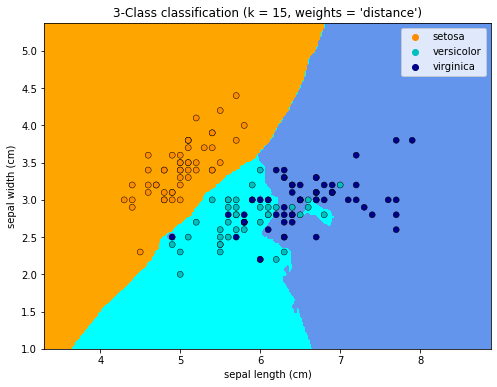

In [146]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

In [147]:
len(y)

150

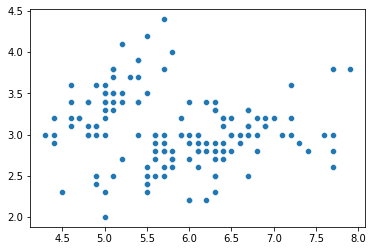

In [148]:
X = iris.data[:, :2]
sns.scatterplot(x=X[:, 0],y=X[:, 1])

In [176]:
# hole sensor daten
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/IBM/iot-predictive-analytics/master/data/iot_sensor_dataset.csv"
df_iotdata=pd.read_csv(url,error_bad_lines=False)
df_iotdata.head()

Xiot=df_iotdata[["footfall",	"atemp"	,"selfLR"	,"ClinLR"	,"DoleLR"	,"PID",	"outpressure",	"inpressure",	"temp"]]
#X=df_iotdata[["footfall","outpressure"]]


y_target_iot=df_iotdata['fail']
y_target_iot.head()

#X.head()

0    1
1    0
2    0
3    0
4    0
Name: fail, dtype: int64

In [150]:
#https://github.com/Starignus/AppliedML_Python_Coursera/blob/master/adspy_shared_utilities.py

# KNN- neues beispiel sensor data

In [32]:
import pandas as pd
sensor = pd.read_csv('https://raw.githubusercontent.com/shadgriffin/machine_failure/master/equipment_failure_data_1.csv')
sensor.head()


#,"DoleLR"	,"PID",	"outpressure",	"inpressure",	"temp"]]

ys_failure=sensor['EQUIPMENT_FAILURE']==1
ys_no_failure=sensor['EQUIPMENT_FAILURE']==0
sensor_failure=sensor[ys_failure].truncate(after=50000)
sensor_no_failure=sensor[ys_no_failure].truncate(after=500)

#sensor_no_failure.head(30)

sensor_failure_all= sensor_failure.append(sensor_no_failure)
sensor_failure_all.head(20)
sensor_failure_all

Xs=sensor_failure_all[["S15",	"S16"	]]	
ys=sensor_failure_all['EQUIPMENT_FAILURE']
sensor_failure_all.head(30)
#sensor_failure_all.shape


,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
143,100001,4/24/15,G,O,Y,1,0.0000,0.00,0.000000,0.000000,8.8924,0.90,170.4,1,0.000000,1023
1452,100003,11/22/16,C,L,T,1,0.0000,0.00,0.000000,0.000000,8.7048,0.00,4.4,1,0.000000,1121
1974,100009,4/27/16,H,M,X,3,0.0000,0.00,23.614483,7202.413793,3.2824,42.70,57.1,1,89.084138,832
2882,100014,10/21/16,H,M,S,2,0.0000,0.00,24.680690,5257.103448,3.7310,25.50,43.1,1,45.019310,1449
2940,100017,12/18/14,E,K,T,2,0.0000,0.00,29.906154,5233.307692,8.4132,0.10,678.0,1,1.092308,9996
4227,100018,6/26/16,A,J,T,3,0.0000,0.00,24.430000,3494.000000,6.0590,0.90,249.1,1,271.170000,1252
4851,100019,3/11/16,B,M,Q,4,0.0000,0.00,28.340000,2522.000000,10.4720,0.00,11.4,1,43.050000,1205
5550,100020,2/8/16,E,L,Y,4,0.0000,0.00,32.703333,6965.333333,7.8960,0.00,15.2,1,8.480000,3313
6556,100022,11/9/16,G,O,Y,2,0.0000,0.00,40.603200,8648.640000,8.8168,22.60,237.3,1,237.416400,1508
6605,100036,12/28/14,A,M,T,4,0.0000,0.00,24.150769,5372.307692,7.4399,0.00,658.2,1,9.210385,1646


In [152]:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fruits = pd.read_table('https://raw.githubusercontent.com/Starignus/AppliedML_Python_Coursera/master/fruit_data_with_colors.txt')
#fruits.head(20)

In [153]:
#fruits.describe()

In [6]:
import matplotlib.cm as cm
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split



#Xiot=df_iotdata[["footfall",	"atemp"	,"selfLR"	,"ClinLR"	,"DoleLR"	,"PID",	"outpressure",	"inpressure",	"temp"]]
X=Xs  #.truncate(after=10)

#X = fruits[['mass', 'width', 'height', 'color_score']]
#y = fruits['fruit_label']
y=ys  #.truncate(after=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):

    # as matrix set data its imßpoort for datframes
    X_mat = X.as_matrix()
    y_mat = y.as_matrix()

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='failure')
    patch1 = mpatches.Patch(color='#00FF00', label='normal')
   
    plt.legend(handles=[patch0, patch1])

        
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("4-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    
    plt.show()

In [7]:
#scoring knn classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


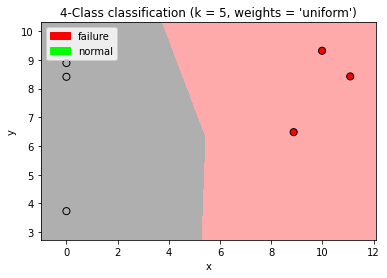

In [8]:
#call above function with kkn =5
#plot the knn with scatter plot
plot_fruit_knn(X_train, y_train, 5, 'uniform')

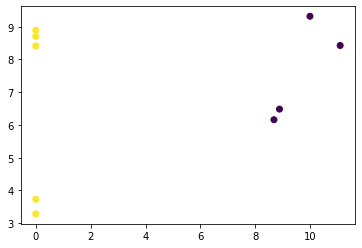

In [9]:
#original scatter plot
plt.scatter(Xs.iloc[:, 0],Xs.iloc[:, 1], c=ys)

# isolation forest classification - scatter plot

In [45]:
X_train.iloc[:, 0]
#X_test

94       0.0000
226      6.4728
265      8.3328
497     18.0000
211     18.2400
         ...   
210     24.9600
6605     0.0000
292      6.6240
124      0.0000
492     19.6800
Name: S15, Length: 426, dtype: float64

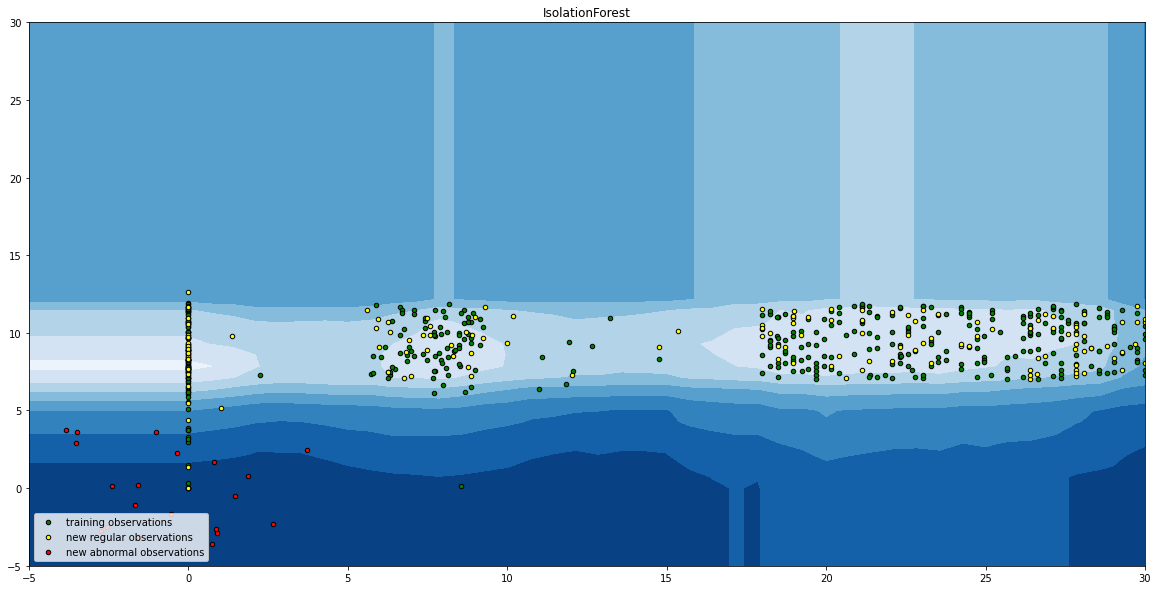

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest



X_train, X_test, y_train, y_test = train_test_split(Xs, ys, random_state=0)


rng = np.random.RandomState(42)
plt.figure(figsize=(20, 10))    
# Generate train data
#X = 0.3 * rng.randn(100, 2)
X_train = X_train
# Generate some regular novel observations
#X = 0.3 * rng.randn(20, 2)
X_test = X_test
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 30, 50), np.linspace(-5, 30, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")

#male konturen isolation forest classifier
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c="green",
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c="yellow",
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')


plt.axis('tight')
#plt.xlim((-5, 5))
#plt.ylim((-5, 5))
plt.legend([b1, b2,c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="lower left")

        
plt.show()

In [158]:
#scoring knn classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))


#plot y_pred as well
y_hat=knn.predict(X_test)
print("ypred: ", y_hat)
print("xtest: ", X_test)
print(" ytest: ",y_test)

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00
ypred:  [0 1 1]
xtest:             S15       S16
2     8.676444  6.159659
1974  0.000000  3.282400
1452  0.000000  8.704800
 ytest:  2       0
1974    1
1452    1
Name: EQUIPMENT_FAILURE, dtype: int64


In [159]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1 0]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [160]:
X_test.shape
X_train.shape

(6, 2)

In [161]:
Xs.iloc[:, 0].shape

(9,)

# beispiel 2: preprocessing the data and exploring - corelation matrix

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

sensor_pre = pd.read_csv('https://raw.githubusercontent.com/shadgriffin/machine_failure/master/equipment_failure_data_1.csv')
sensor_pre.head()
sensor_pre#.drop('EQUIPMENT_FAILURE', axis=1)

#,"DoleLR"	,"PID",	"outpressure",	"inpressure",	"temp"]]

ys_pre=sensor_pre['EQUIPMENT_FAILURE']
sensor_pre.columns
Xsensor_pre= sensor_pre[['ID', 'REGION_CLUSTER', 'MAINTENANCE_VENDOR', 'MANUFACTURER', 'WELL_GROUP', 'S15', 'S17', 'S13', 'S5', 'S16', 'S19', 'S18', 'S8', 'AGE_OF_EQUIPMENT']]



Xsensor_pre.head()

,ID,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,S8,AGE_OF_EQUIPMENT
0,100001,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0.0,880
1,100001,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0.0,881
2,100001,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0.0,882
3,100001,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0.0,883
4,100001,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0.0,884


In [3]:
Xsensor_pre.dtypes

ID                      int64
REGION_CLUSTER         object
MAINTENANCE_VENDOR     object
MANUFACTURER           object
WELL_GROUP              int64
S15                   float64
S17                   float64
S13                   float64
S5                    float64
S16                   float64
S19                   float64
S18                   float64
S8                    float64
AGE_OF_EQUIPMENT        int64
dtype: object

In [4]:
Xsensor_pre["REGION_CLUSTER"].value_counts()

A    31433
B    29971
C    25585
D    16813
E    16813
G    15351
H     9503
F     4386
Name: REGION_CLUSTER, dtype: int64

In [5]:
# encoding the columns with categorical values

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
Xsensor_pre["REGION_CLUSTER_CODE"] = ord_enc.fit_transform(Xsensor_pre[["REGION_CLUSTER"]])
Xsensor_pre["MAINTENANCE_VENDOR_code"] = ord_enc.fit_transform(Xsensor_pre[["MAINTENANCE_VENDOR"]])
Xsensor_pre["MANUFACTURER_code"] = ord_enc.fit_transform(Xsensor_pre[["MANUFACTURER"]])
Xsensor_pre.head(11)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,S8,AGE_OF_EQUIPMENT,REGION_CLUSTER_CODE,MAINTENANCE_VENDOR_code,MANUFACTURER_code
0,100001,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0.0,880,6.0,6.0,8.0
1,100001,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0.0,881,6.0,6.0,8.0
2,100001,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0.0,882,6.0,6.0,8.0
3,100001,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0.0,883,6.0,6.0,8.0
4,100001,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0.0,884,6.0,6.0,8.0
5,100001,G,O,Y,1,7.971100,164.545833,38.74,3448.0,6.645075,1.5,24.845833,0.0,885,6.0,6.0,8.0
6,100001,G,O,Y,1,11.009948,175.852174,38.84,3457.0,6.401404,1.5,24.886957,0.0,886,6.0,6.0,8.0
7,100001,G,O,Y,1,8.283491,136.767273,39.58,3523.0,8.507864,2.9,24.904545,0.0,887,6.0,6.0,8.0
8,100001,G,O,Y,1,7.577143,182.293333,39.78,3540.0,9.884905,2.9,24.933333,0.0,888,6.0,6.0,8.0
9,100001,G,O,Y,1,8.487360,203.375000,39.54,3519.0,9.883830,3.3,24.945000,0.0,889,6.0,6.0,8.0


In [6]:
Xsensor_pre.columns

Index(['ID', 'REGION_CLUSTER', 'MAINTENANCE_VENDOR', 'MANUFACTURER',
       'WELL_GROUP', 'S15', 'S17', 'S13', 'S5', 'S16', 'S19', 'S18', 'S8',
       'AGE_OF_EQUIPMENT', 'REGION_CLUSTER_CODE', 'MAINTENANCE_VENDOR_code',
       'MANUFACTURER_code'],
      dtype='object')

In [7]:
Xsensor_pre=Xsensor_pre[['ID', 
       'WELL_GROUP', 'S15', 'S17', 'S13', 'S5', 'S16', 'S19', 'S18', 'S8',
       'AGE_OF_EQUIPMENT', 'REGION_CLUSTER_CODE', 'MAINTENANCE_VENDOR_code',
       'MANUFACTURER_code']]


X_train, X_test, y_train, y_test = train_test_split(Xsensor_pre, ys_pre, random_state=0)       

In [8]:
#https://medium.com/swlh/machine-learning-for-equipment-failure-prediction-and-predictive-maintenance-pm-e72b1ce42da1

"""

ID — ID field that represents a specific machine.
DATE — The date of the observation.
REGION_CLUSTER — a field that represents the region in which the machine resides.
MAINTENANCE_VENDOR — a field that represents the company that provides maintenance and service to the machine.
MANUFACTURER — the company that manufactured the equipment in question.
WELL_GROUP — a field representing the type of machine.
EQUIPMENT_AGE — Age of the machine, in days.
S15 — A Sensor Value.
S17 — A Sensor Value.
S13 — A Sensor Value.
S16 — A Sensor Value.
S19 — A Sensor Value.
S18 — A Sensor Value.
S8 — A Sensor Value.
EQUIPMENT_FAILURE — A ‘1’ means that the equipment failed. A ‘0’ means the equipment did not fail.
Our first goal in this exercise is to build a model that predicts equipment failure. In other words, we will use the other variables in the data frame to predict EQUIPMENT_FAILURE.

"""

sensor_pre.describe()

,ID,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
count,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000
mean,100320.419512,2.497561,14.185534,85.918460,35.643733,4557.518000,7.925408,8.229842,110.082879,0.001368,117.481750,2751.146341
std,178.503502,1.093775,8.665254,85.572229,14.723678,2497.993986,2.426462,13.041714,197.356230,0.036961,204.107481,3368.354905
min,100001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.490000,0.000000
25%,100164.000000,2.000000,7.548000,0.000000,28.250000,3193.000000,6.596000,0.900000,11.300000,0.000000,8.660000,755.000000
50%,100328.000000,2.000000,11.077500,95.480000,35.020000,4224.000000,8.025600,4.200000,34.000000,0.000000,44.320000,1143.000000
75%,100472.000000,3.000000,22.080000,163.660000,41.940833,5615.000000,9.480700,10.500000,118.900000,0.000000,135.080000,3224.500000
max,100612.000000,4.000000,51.225600,478.470000,570.510000,52767.000000,23.533800,291.100000,3995.900000,1.000000,1824.960000,15170.000000


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


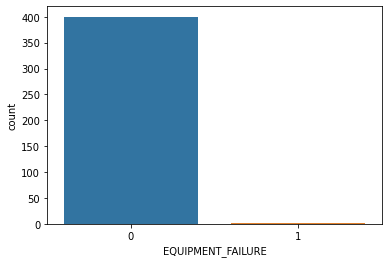

In [9]:
# hist the sensor data failure-distribution

import seaborn as sns
import matplotlib.pyplot as plt
#plt.figure(figsize=(10,10))
sensor_preS5=sensor_pre.truncate( after=400)

sns.countplot(sensor_preS5['EQUIPMENT_FAILURE'],label="Count")
#plt.show()

In [10]:
#plot gaussian distribution

mu, sigma = 0, 5 # mean and standard deviation
#s = np.random.normal(mu, sigma, 1000)

s=sensor_preS5['S15'].append(- sensor_preS5['S15'])

abs(mu - np.mean(s))
abs(sigma - np.std(s, ddof=1))
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

NameError: name 'np' is not defined

In [ ]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(sensor_preS5['S15'], hist=False)

plt.show()

In [12]:
#check how many failures
sens_failure=sensor_pre[sensor_pre['EQUIPMENT_FAILURE']==1]
sens_failure.shape

(205, 16)

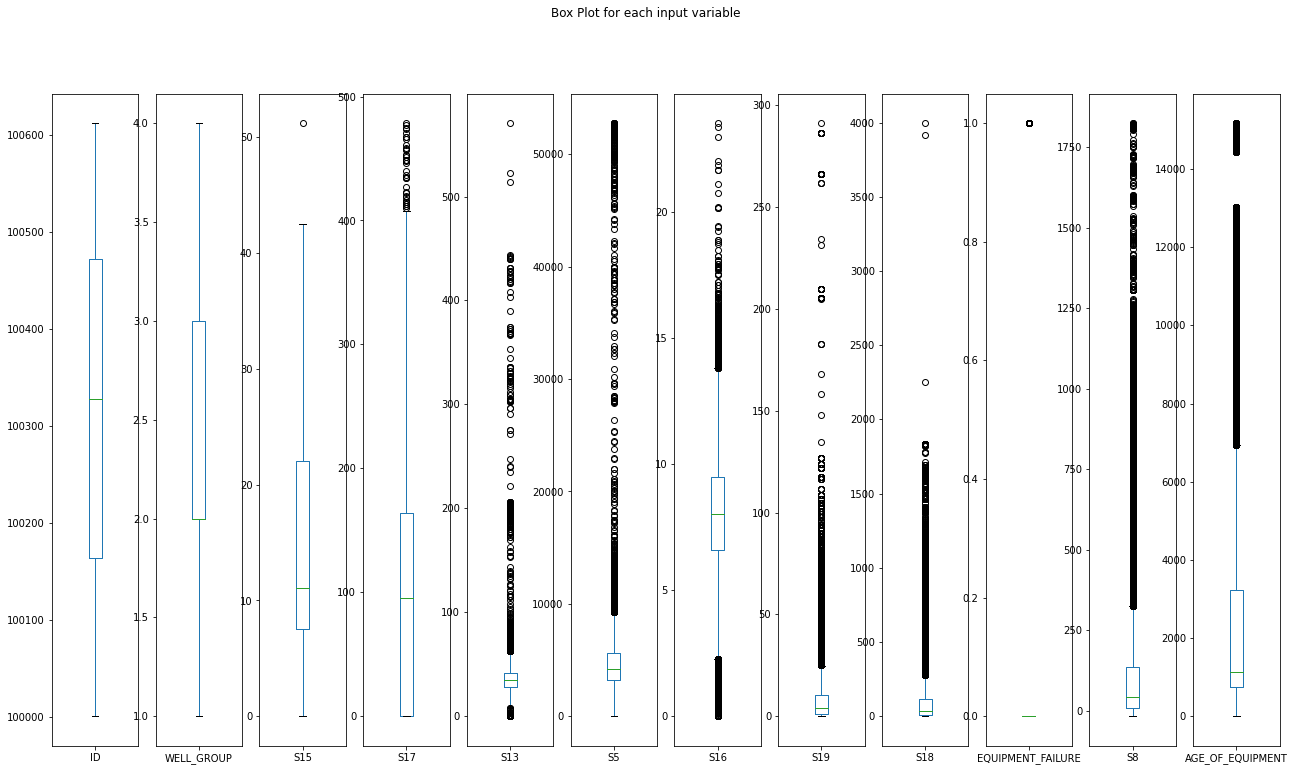

In [13]:
#box plot for each input feature
sensor_pre.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(22,12), 
                                        title='Box Plot for each input variable')
plt.savefig('fruits_boxplot')
plt.show()

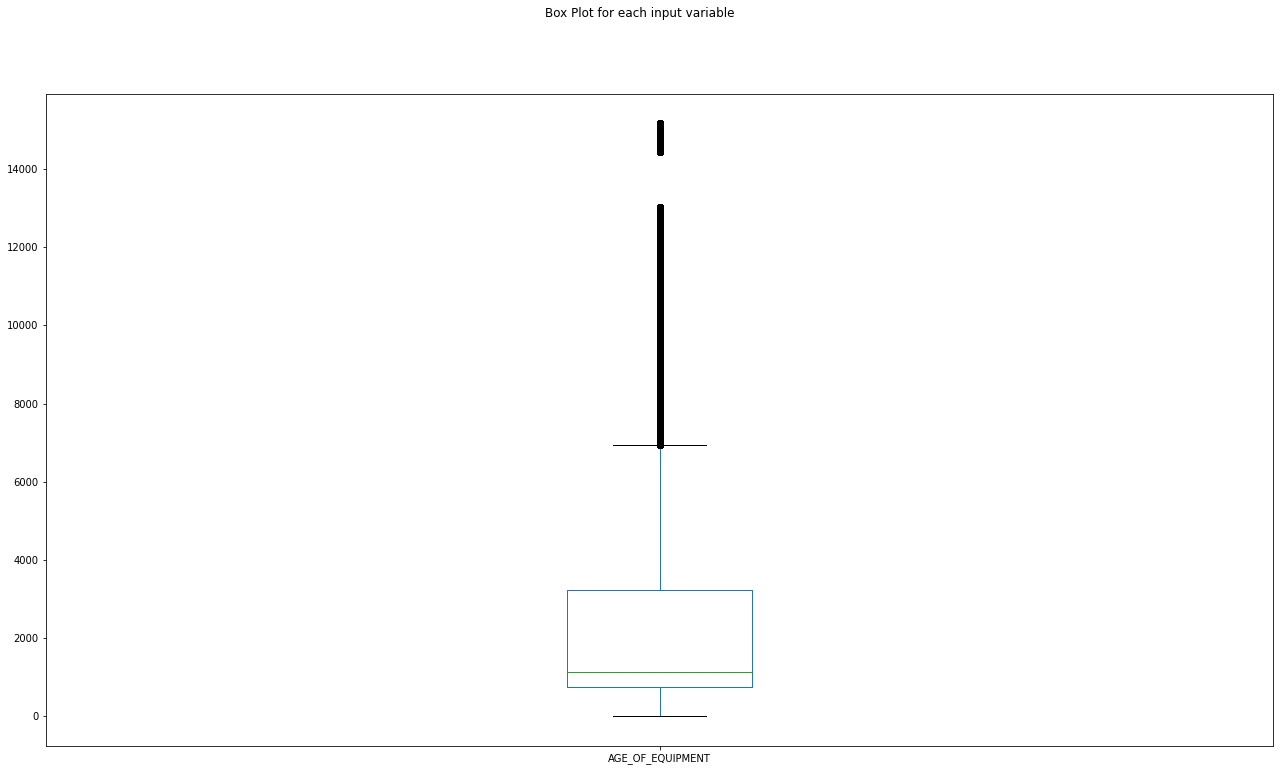

In [169]:
sensor_pre["AGE_OF_EQUIPMENT"].plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(22,12), 
                                        title='Box Plot for each input variable')
#plt.savefig('fruits_boxplot')
plt.show()

In [170]:
import statistics
statistics.median(sensor_pre["AGE_OF_EQUIPMENT"])

1143

# feature engineering

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/anaconda/envs/azureml_py3

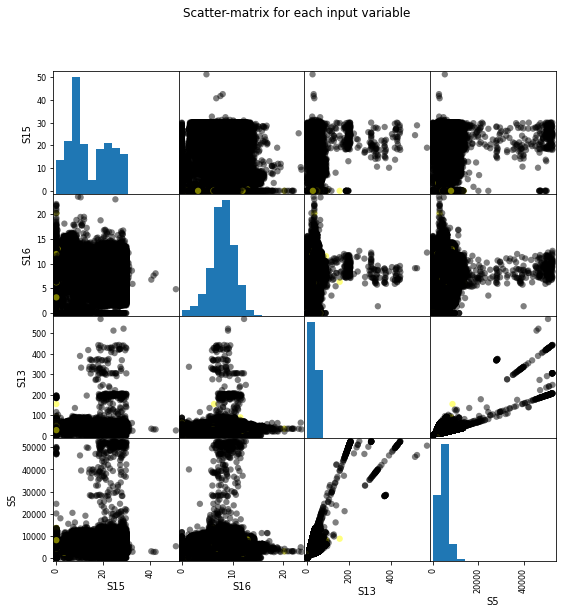

In [14]:
# plot scatter_matrix with failkure as color
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(Xsensor_pre[[ 'S15', 'S16', 'S13', 'S5']], c=ys_pre, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

# Correlation Matrix with Heatmap 

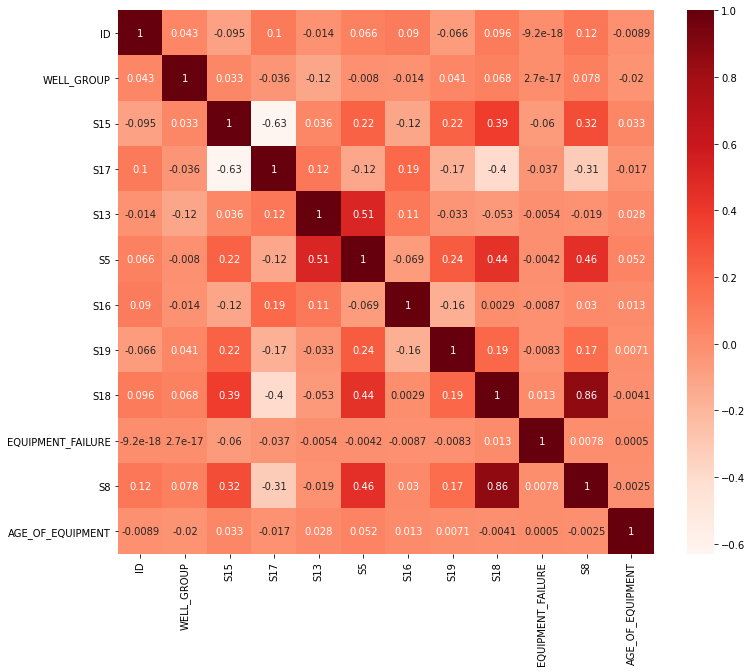

In [16]:
#Using Pearson Correlation
import seaborn as sns

plt.figure(figsize=(12,10))
cor = sensor_pre.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

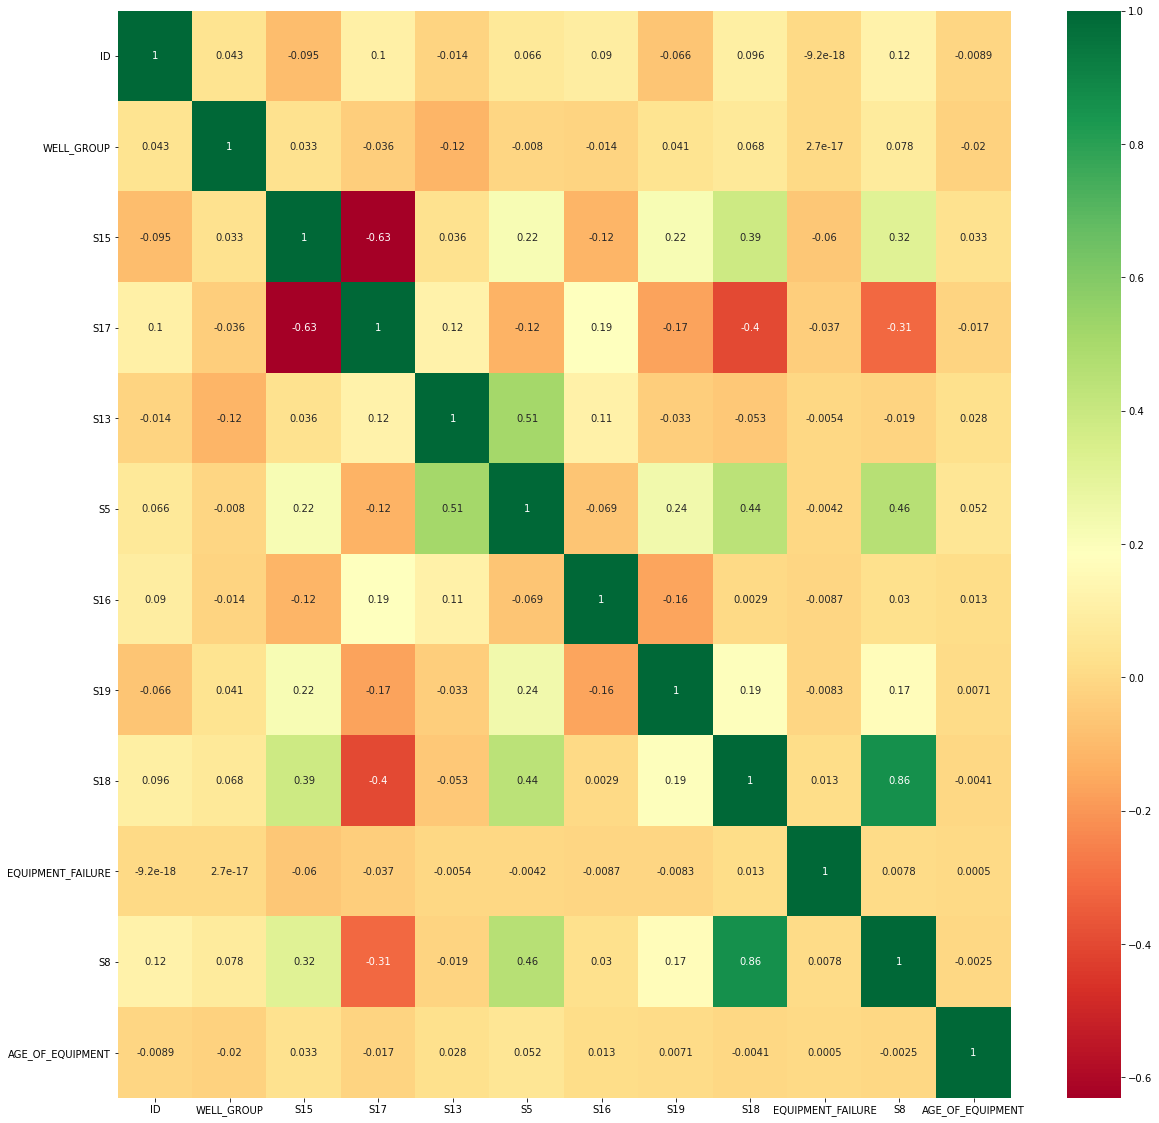

In [24]:
corrmat = sensor_pre.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(sensor_pre[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# unvariate feauture selection
https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [19]:
X_train

,ID,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,S8,AGE_OF_EQUIPMENT,REGION_CLUSTER_CODE,MAINTENANCE_VENDOR_code,MANUFACTURER_code
15552,100065,3,26.1600,0.00,42.880000,2401.00000,4.6215,0.00,31.7,31.100000,901,1.0,1.0,0.0
120755,100511,3,30.0000,0.00,20.980000,4469.00000,9.4302,9.00,269.2,268.240000,1020,4.0,2.0,0.0
31553,100140,4,6.1920,173.60,30.090000,3581.00000,10.0560,5.40,6.6,3.220000,320,2.0,6.0,4.0
71427,100316,3,21.6000,0.00,25.310000,3644.00000,5.2373,3.50,114.4,155.400000,11300,0.0,5.0,7.0
22259,100098,3,25.6800,0.00,24.520000,6276.00000,4.8279,69.96,329.0,325.320000,4149,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,100180,1,21.5496,25.52,41.210000,3132.00000,12.1024,0.40,85.7,53.510000,966,0.0,6.0,3.0
97639,100425,3,19.6800,0.00,54.843333,14039.86667,7.3554,22.00,163.3,304.566667,1676,3.0,1.0,3.0
95939,100419,1,6.6554,251.34,53.490000,3584.00000,6.8250,3.30,8.4,4.280000,798,2.0,4.0,7.0
117952,100493,3,19.6800,0.00,52.910000,6296.00000,6.5280,12.60,119.5,108.840000,441,0.0,1.0,7.0


In [17]:
#Correlation with output variable
cor_target = (cor["EQUIPMENT_FAILURE"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.0001]
relevant_features

relevant_features.sort_values( ascending=False)

EQUIPMENT_FAILURE    1.000000
S18                  0.012836
S8                   0.007830
AGE_OF_EQUIPMENT     0.000499
Name: EQUIPMENT_FAILURE, dtype: float64

In [21]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(abs(X_train), y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xsensor_pre.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                      Specs         Score
3                       S17  13429.557838
8                       S18   6545.157519
5                        S5   3528.908505
9                        S8   2578.394757
2                       S15   2214.358732
10         AGE_OF_EQUIPMENT   2073.188794
7                       S19    167.579086
4                       S13      7.839328
6                       S16      6.720061
12  MAINTENANCE_VENDOR_code      1.826500


([<matplotlib.axis.XTick at 0x7fb1a8583f60>,
 <a list of 5 Text major ticklabel objects>)

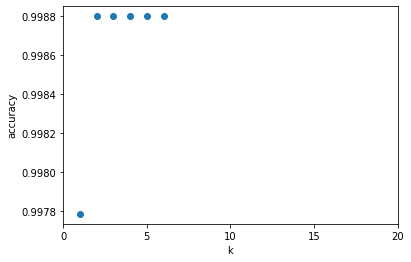

In [30]:
#find optimal accuracy for number of Ks and plot by accuray
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1, 7)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [33]:
X_train.head()

,ID,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,S8,AGE_OF_EQUIPMENT,REGION_CLUSTER_CODE,MAINTENANCE_VENDOR_code,MANUFACTURER_code
15552,100065,3,26.160,0.0,42.88,2401.0,4.6215,0.00,31.7,31.10,901,1.0,1.0,0.0
120755,100511,3,30.000,0.0,20.98,4469.0,9.4302,9.00,269.2,268.24,1020,4.0,2.0,0.0
31553,100140,4,6.192,173.6,30.09,3581.0,10.0560,5.40,6.6,3.22,320,2.0,6.0,4.0
71427,100316,3,21.600,0.0,25.31,3644.0,5.2373,3.50,114.4,155.40,11300,0.0,5.0,7.0
22259,100098,3,25.680,0.0,24.52,6276.0,4.8279,69.96,329.0,325.32,4149,3.0,3.0,3.0


# feature importance
https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e 

In [1]:
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset

# define the model
rf = RandomForestClassifier() 

rf.fit(X_train,y_train)

importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title("feature importance bar chart")
pyplot.show()

NameError: name 'X_train' is not defined

# svc classification

In [191]:
from sklearn import svm

#Create a svm Classifier
#kernel ooption _ linear, rbf, Polynomial 
clf = svm.SVC(C=1.0, kernel='poly', degree=3, gamma=2) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(Xs)
score=clf.score(X_test, y_test)
score

1.0

In [192]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

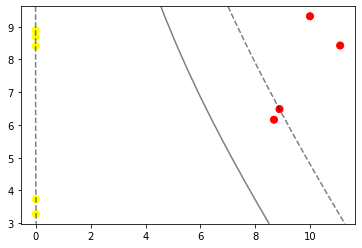

In [194]:
plt.scatter(Xs.iloc[:, 0],Xs.iloc[:, 1], c=ys,s=50, cmap='autumn')
plot_svc_decision_function(clf);

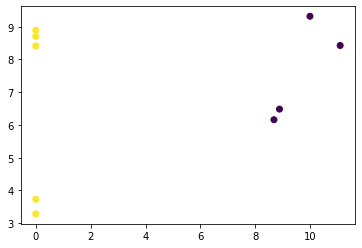

In [178]:
#original scatter plot
plt.scatter(Xs.iloc[:, 0],Xs.iloc[:, 1], c=ys)

In [195]:
#plot_fruit_knn(X_train, y_train, 5, 'uniform')